Muslimov Arthur, Last Checkpoint: 03/12/2020
                 Last Checkpoint: 11/30/2021

In [40]:
import numpy as np

In [41]:
import pandas as pd

In [42]:
%xmode Plain

Exception reporting mode: Plain


In [43]:
%autosave 0

Autosave disabled


Мы уже умеем получать доступ к частям массива с помощью простого индекса          <br/>
(`arr[0]`), срезов (`arr[:5]`) и булевых масок (`arr[arr > 0]`). Здесь            <br/>
же ты узнаешь, так называемую ***прихотливую индексацию*** **(fancy indexing)**.  <br/>
Это когда ты даёшь массиву не скалярное индекс, а целый массив таких индексов.  

## Исследуем возможности "прихотливой" индексации

Суть её ты, наверное, уже понял - мы передаём массив индексов и получаем массив элементов.

In [44]:
rng42 = np.random.RandomState(42)  # создаём свой генератор

x = rng42.randint(20, size=10)
x

array([ 6, 19, 14, 10,  7,  6, 18, 10, 10,  3])

In [45]:
ind = [3, 5, 1]
x[ind]  # или постаринке - [x[3], x[5], x[1]]

array([10,  6, 19])

В случае "прихотливой" индексации форма результата равна форме ***массива индексов***  <br/>
**(index arrays)**, а не ***индексируемого массива***. Тут главное не перепутать.

In [46]:
ind = np.array([[3, 5],   # да, ind именно массив, а не список.
                [1, 4]])  # со список бы была ошибка
x[ind]

array([[10,  6],
       [19,  7]])

"Прихотливая" индексация работает и в случае многомерных массивов.

In [47]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Также, как и с обычной индексацией, первый массив индексов,  <br/>
относится к строкам а второй - к столбцам.

In [48]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

x[row, col]

array([ 2,  5, 11])

Т.е. мы создаём пары координат. Первые координаты - `[0, 2]`,  <br/>
вторые - `[1, 1]`, а третие - `[3, 2]`. Выходит, что они       <br/>
как-бы накладываются друг на друга, создавая координаты.

Составление пар координат подчиняется всем правилам транслирования,  <br/>
которые мы разобрали в прошлом разделе.

In [49]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Это значит, что с каждой строки индексируемого массива, заданной  <br/>
первым массивом индексов, берутся элементы, заданные вторым.

Какжое строчное значение соединяется с каждым вектором-столбцом точно  <br/>
также, как при транслировании арифметических операций. Например:

In [50]:
row[:, np.newaxis] * col  # тут выходит массив произведений, а там будет массив координат

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

> При работе с "прихотливой" индексации важно никогда не забывать,        <br/>
> что возвращаемое значение отражает ***транслируюмую форму индексов***,  <br/>
> а не форму индексируемого массива.

## Комбинированная индексация

Прихотливую индексацию можно применять наряду с другими схемами     <br/>
индексации. Это даёт возможность делать ещё более сложную выборку.  <br/>

In [51]:
x  # наш подопытный

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
x[1, [0, 2]]  # простой и "прихотливый" индекс

array([4, 6])

In [53]:
x[:2, [0, 3]]  # срези и "прихотливый" индекс

array([[0, 3],
       [4, 7]])

In [54]:
mask = np.array([1, 0, 1, 0], dtype=bool)  # да, так тоже можно
row = np.array([0, 1])

x[row[:, np.newaxis], mask]  # "прихотливая" индексация и маска

array([[0, 2],
       [4, 6]])

> Все эти варианты индексации вместе обеспечивают набор чрезвычайно  <br/>
> гибких операций по доступу к значениям массивов и их изменению.

Но есть некоторые неочевидные вещи.

In [55]:
mask = [True, False, True]
row = [0, 1]

x[mask, row]

array([0, 9])

Готов спорить, ты ожидал увидеть двумерный массив. Дело тут в том,     <br/>
что булевый массив-маска здесь - это одномерный массив, т.е. никакого  <br/>
транслирования не происходит.

In [56]:
x[mask] == x[[0, 2]]

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True]])

Получается, что мы просто включаем метками `True` строки, которым  <br/>
массив индексов `row` выделяет по одному своему элементу.

Это действие, когда булевый массив становится массивом индексов, выполняет     <br/>
функция `np.where()`. Почитай про неё, она может делать ещё кое-что полезное.

## Пример: выборка случайных точек

"Прихотливая" индексация часто применяется для выборки подмассивов из матрицы.

In [57]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

X = np.random.multivariate_normal(mean, cov, 100)  # мы всё-таки работаем со статистикой, её тоже нужно изучать
X.shape

(100, 2)

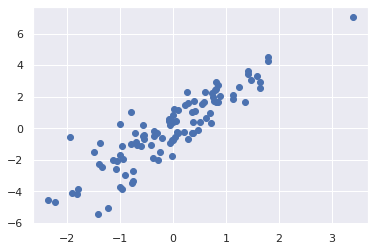

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt  # это разберём в одной из следующих глав (4 глава)
import seaborn; seaborn.set()  # для стиля графика

plt.scatter(X[:, 0], X[:, 1]);  # берём сначала x, а затем y

Выбираем 20 случайных точек.

In [59]:
indices = np.random.choice(X.shape[0], 20, replace=False)  # replace=False - значит, что повторов не будет
indices

array([77, 71, 92, 91, 20, 83, 55, 93, 32, 79, 31, 88, 14, 47,  2, 57, 43,
       25, 45, 33])

In [60]:
selection = X[indices]  # а вот и гвоздь программы
selection.shape

(20, 2)

Чтобы увидеть выбранные точки, мы всего лишь нарисуем поверх другую диаграмму,  <br/>
где выбранные точки выделены ... другим цветом. В книге они выделяются иначе.

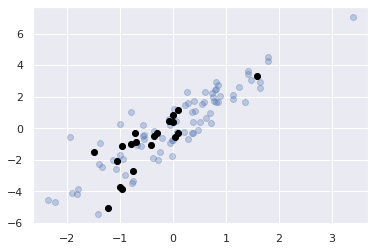

In [61]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor="black");

> Подобная стратегия часто используется для быстрого секционирования наборов данных,        <br/>
> часто требуемого при разделении на обучающую/тестовую последовательности для              <br/>
> проверки статистических моделей (см. раздел "Гиперпараметры и проверка модели" главы 5),  <br/>
> а также в выборочных методах ответа на статистические вопросы.

## Изменение значений с помощью прихотливой индексации

Т.к. "прихотливая" даёт нам полный доступ к значениям, мы можем  <br/>
не только считывать их, но ещё и изменять.

In [62]:
x = np.arange(10)
i = [2, 1, 4]

x[i] = 77  # как и писалось, транслирование применяется повсеместно
x

array([ 0, 77, 77,  3, 77,  5,  6,  7,  8,  9])

In [63]:
x[i] += 10
x

array([ 0, 87, 87,  3, 87,  5,  6,  7,  8,  9])

Но есть некоторые не очень очевидные моменты.

In [64]:
x = np.zeros(5, dtype=int)  # имя функции при инициализации - zeros(size, dtype=float, order='C')
  # [0, 0, 0, 0, 0]         # order тут - это стиль размещения элементов массива в памяти - или 'C' или 'F' (Fortran)
x[ [0, 0] ] = [2, 6]
x

array([6, 0, 0, 0, 0])

А как-же `2`? Тут дело в том, что сначала выполнилось   <br/>
присваивание `x[0] = 2`, и сразу же следом `x[0] = 6`.   

Довольно логично, но посмотри на такую операцию:

In [65]:
i = [2, 3, 3]
x[i] += 1
x

array([6, 0, 1, 1, 0])

Можно было ожидать, что `x[3]` будет хранить 2, т.к. мы его индексировали два раза.       <br/>
Но, на самом деле, операция `x[i] += 1`, развёртывающаяся в `x[i] = x[i] + 1`,            <br/>
проводит буферизацию. Т.е. значение она считывает из исходного `x`, не меняя его,         <br/>
и записывает результат операции с ним в возвращаемый буфер - `x[i] = [0, 0, 0] + 1`.              

Чтобы избежать буферизации, и оперировать исходный массив,  <br/>
существует метод `at()` универсальных функций.

In [66]:
x = np.zeros(5)
np.add.at(x, i, 1)  # at(a, indecex, b=None)
x

array([0., 0., 1., 2., 0.])

Есть схожый по духу метод `reduceat()`, о котором ты можешь прочитать  <br/>
в документации. Я об него "зубы сломал", не зная английский.

## Пример: разбиение данных на интервалы

Допустим, мы хотим собственноручно расчитать гистограмму.

In [67]:
np.random.seed(42)
x = np.random.randn(100)

# Расчитываем гистрограмму вручную
bins = np.linspace(-5, 5, 21)  # просчитываем точки, между которыми будут интервалы.
                               # Почему 21? Чтобы получаемые числа были более ровными - т.е. не 1.33333, а 1.4.
                               # Вот моя формула собственного производства для np.linspace() - (end - start)/(size - 1)
                               # Эта формула даст тебе разницу между значениями, которых вернёт функция.
                               # end - start здесь - это сколько целых чисел в отрезке, не включая start,
                               # а от size отнимаем 1 для того, чтобы выделить место под start.
counts = np.zeros_like(bins)  # наша будущая таблица рекордов

# Находим подходячий интервал для каждого x
i = np.searchsorted(bins, x)  # np.searchsorted() здесь берёт каждый элемент из x и находит для него
                              # подходящее место в bins, чтобы не нарушать порядок по возрастанию.
                              # Возвращает она индекс подходящего места, который для нас - интервал

# Добавляем по очку каждому интервалу
np.add.at(counts, i, 1)

Теперь у нас есть готовый массив, который осталось лишь только визулизировать.  <br/>
ось X здесь будет `bins`, а осью Y станет наш счёт, т.е. `counts`.

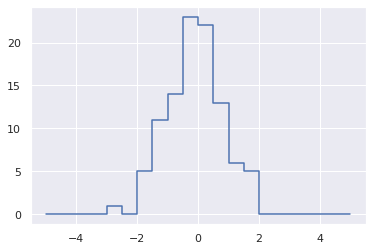

In [93]:
plt.plot(bins, counts, drawstyle="steps", linestyle="solid");

Как видим, у нас есть небольшое смещение к тёмной стороне,      <br/>
т.е. к отрицательным числам. И большущее предупреждение выше.   <br/>
(****вместо большущего предупреждения было полноценное          <br/>
     исключение. Теперь `"steps"` стоит прописывать в параметре <br/>
     `drawstyle=`)                                              <br/>

Если нет необходимости самим всё расчитывать, то пользуся функцией `plt.hist()`.

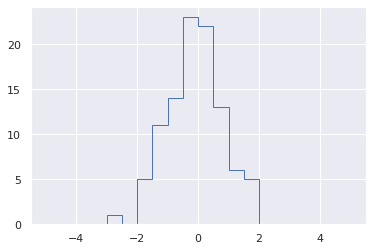

In [95]:
plt.hist(x, bins, histtype="step");

Да, очень похоже. Для расчёта рейтинга разбиения по интервалам Matplotlib   <br/>
пользуется функцией `np.histogram()`, выполняющей примерно те же действия,  <br/>
что сделали мы. Давай же узнаем кто быстрее.

In [96]:
print("NumPy-версия:")
%timeit counts, edges = np.histogram(x, bins)
print("Наша версия:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy-версия:
30.5 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Наша версия:
12.2 µs ± 202 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Наша подделка работает в 2 раза быстрее оптимизированного, написанного   <br/>
большими дядями, супер алгоритма на стеройдах из NumPy! Но как?          <br/>
Дело не в том, что мы оказались умнее. Просто `np.histogram()` расчитан  <br/>
на гораздо болшую производительность. И, ещё, он более гибкий.           <br/>
Давай создадим более реальные условия и протеструем их заного.

In [97]:
x = np.random.randn(1000000) # d0=1m
print("NumPy-версия:")
%timeit counts, edges = np.histogram(x, bins)

print("Наша версия:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy-версия:
58 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Наша версия:
82.5 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Результаты говорят нам, что функции в NumPy, всё-таки, гораздо более предпочтительны.      <br/>
Они почти всегда используют более лучший алгоритм, чем ты сможешь набросать, да и          <br/>
они защищены от всяческих ошибок. Но не отчаивайся! Понимание внутреннего устройства       <br/>
любого алгоритма уже много стоит. А если ты осилишь ещё и хороший алгоритм, которым        <br/>
действительно пользуются, то ты будешь на более глубоком уровне понимать свой инструмент,  <br/>
и, может быть, однажды и ты сам создашь такой алгоритм, который облегчит другим жизнь.